# Feature Engineering-All Techniques To Handle Missing Values- Day 1 . Worked on it on 10 Feb 2021

In [19]:
import pandas as pd

In [20]:
df=pd.read_csv("titanic.csv")

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.shape

(891, 12)

In [24]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [25]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [26]:
import numpy as np

In [27]:
df["cabin_null"]=np.where(df["Cabin"].isnull(),1,0)

In [28]:
df["cabin_null"].value_counts()

1    687
0    204
Name: cabin_null, dtype: int64

In [29]:
df["cabin_null"].mean()

0.7710437710437711

In [30]:
df.groupby("Survived").cabin_null.mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [31]:
df["age_null"]=np.where(df["Age"].isnull(),1,0)

In [32]:
df.groupby("Survived").age_null.mean()

Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64

# Mean/Median/Mode Imputation

In [35]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])

In [37]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [38]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [46]:
meedian=df["Age"].median()

In [47]:
print(meedian)

28.0


In [41]:
impute_nan(df,"Age",meedian)

In [43]:
df[df["Age"].isnull()]

,Survived,Age,Fare,Age_median
5,0,NaN,8.4583,28.0
17,1,NaN,13.0000,28.0
19,1,NaN,7.2250,28.0
26,0,NaN,7.2250,28.0
28,1,NaN,7.8792,28.0
...,...,...,...,...
859,0,NaN,7.2292,28.0
863,0,NaN,69.5500,28.0
868,0,NaN,9.5000,28.0
878,0,NaN,7.8958,28.0


# random sample imputation

In [48]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])

In [51]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [54]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(), random_state=1)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample

In [55]:
impute_nan(df,"Age")

In [57]:
df[df["Age"].isnull()]

,Survived,Age,Fare,Age_random
5,0,NaN,8.4583,15.0
17,1,NaN,13.0000,7.0
19,1,NaN,7.2250,33.0
26,0,NaN,7.2250,14.0
28,1,NaN,7.8792,21.0
...,...,...,...,...
859,0,NaN,7.2292,29.0
863,0,NaN,69.5500,40.0
868,0,NaN,9.5000,30.0
878,0,NaN,7.8958,49.0


# new feature

In [58]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])

In [60]:
df["Age_Nan"]=np.where(df["Age"].isnull(),1,0)

In [62]:
df["Age_Nan"].mean()

0.19865319865319866

# Extreme Value

In [71]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])

In [72]:
extreme=df.Age.mean()+3*df.Age.std()

In [73]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end"]=df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [74]:
impute_nan(df,"Age", df.Age.median(), extreme)

In [75]:
df.head(10)

,Survived,Age,Fare,Age_end
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


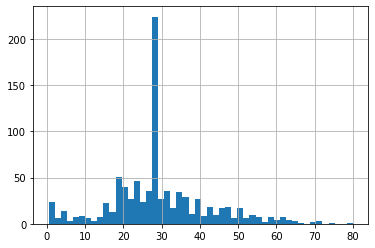

In [77]:
df.Age.hist(bins=50)

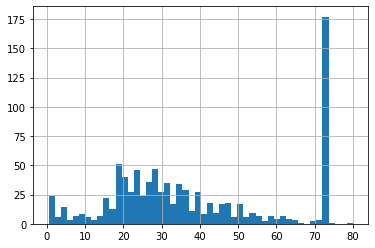

In [78]:
df.Age_end.hist(bins=50)